# Business Case: - Descriptive Statistics & Probability

### Business Problem

Market researchers from AdRight are assigned the task of identifying the differences between the treadmill products offered by CardioGood Fitness based on customer characteristics, to provide a better recommendation of the treadmills to the new customers.

Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line by developing appropriate tables and charts. For each CardioGood Fitness treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

In order to collect data, CardioGoodFitness decides to analyze data from treadmill purchases at its retail stores in the last three months.The team identifies the following customer variables to study:

Dataset Link: <a href="https://www.kaggle.com/saurav9786/cardiogoodfitness?select=CardioGoodFitness.csv">CardioGoodFitness.csv</a>

|Feature|Possible Values|
|-------|---------------|
|Product Purchased |TM195, TM498, or TM798|
|Gender|Male/Female|
|Age|	In years|
|Education|	In years|
|MaritalStatus|	Single or partnered|
|Income|Annual income (in $)|
|Usage|The avg. no. of times customer plans to use the treadmill each week.|
|Miles|The avg. no. of miles the customer expects to walk/run each week|
|Fitness|Self-rated fitness on a 1-to-5 scale (1-poor shape & 5-excellent shape.)|

### Importing the required libraries or packages for EDA

In [1]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Utility Functions - Used during Analysis

#### Missing Value - Calculator

In [2]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md

### Categorical Variable Analysis 
  - Bar plot - Frequency of feature in percentage
  - Pie Chart

In [3]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'white')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("crest"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1

### Function for Outlier detection
  - Box plot - for checking range of outliers
  - distplot - For checking skewness

In [4]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12,family = "Comic Sans MS")
        sns.boxplot(y = df[var],color='m',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='m',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

### Function for Bi-variante Analysis
  - Used countplot for the analysis

In [5]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
        string = " based Distribution"
    plt.show()

###  Function Bi Multi variant Analysis for Numericals variables with Categrical and dependent variable
  - Used Boxplot 
  - Point plot

In [6]:
def num_mult_analysis(df,colname,category,groupby,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, hue = groupby,data = df,ax=ax[rows][0])
        sns.pointplot(x=df[category],y=df[var],hue=df[groupby],ax=ax[rows][1]) 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()

### Loading the Dataset

In [7]:
treadmill_usg_data = pd.read_csv("./CardioGoodFitness.csv")

In [8]:
treadmill_usg_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [9]:
treadmill_usg_data.shape

(180, 9)

In [10]:
treadmill_usg_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Validating Duplicate Records.

In [11]:
# Dropping Duplicates if any
treadmill_usg_data=treadmill_usg_data.drop_duplicates()
treadmill_usg_data.shape

(180, 9)

### Inference 
  - No Duplicate records found.

### Missing Value

In [12]:
missingValue(treadmill_usg_data).head(5)

Total records =  180


,Total Missing,In Percent
Product,0,0.0
Age,0,0.0
Gender,0,0.0
Education,0,0.0
MaritalStatus,0,0.0


### Inference
  - No missing value found.

### Unique values (counts) for each Feature

In [13]:
treadmill_usg_data.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

### Unique values (names) are checked for each Features

In [14]:
treadmill_usg_data['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [15]:
treadmill_usg_data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [16]:
treadmill_usg_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
treadmill_usg_data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [18]:
treadmill_usg_data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [19]:
treadmill_usg_data['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [20]:
treadmill_usg_data['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [21]:
treadmill_usg_data['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [22]:
treadmill_usg_data['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

### Inference
  - No abnormalities were found in the data.

### DataType Validation

In [23]:
treadmill_usg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.1+ KB


### Inference
  - No problems with the type of data used.

### Analyzing basic statistics about each feature, such as count, min, max, and mean

In [24]:
treadmill_usg_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Inferences

  - Huge difference in **income for customers** who purchase treadmills. Ranging between USD 29562 to 104581.

## Data Preparation

### Dervied Columns

  - Added 2 new feature from Age
    - **"Age Category"** - Teens, 20s, 30s and Above 40s
    - **"Age Group"** - 14-20 , 20-30, 30-40 & 40-60 
  - Added 1 new categorial feature based on the income
    - "IncomeSlab" - Low Income, Lower-middle income,Upper-Middle income and High income


### AgeCategory & Age Group

In [25]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
treadmill_usg_data['AgeGroup'] = pd.cut(treadmill_usg_data['Age'], bins)
treadmill_usg_data['AgeCategory'] = pd.cut(treadmill_usg_data['Age'], bins,labels=labels)

In [26]:
treadmill_usg_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,TM195,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,TM195,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,TM195,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,TM195,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,TM195,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


### Income Slab

In [27]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
treadmill_usg_data['IncomeSlab'] = pd.cut(treadmill_usg_data['Income'],bins_income,labels = labels_income)
treadmill_usg_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
0,TM195,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens,Low Income
1,TM195,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Low Income
2,TM195,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Low Income
3,TM195,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Low Income
4,TM195,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Lower-middle income


## Univariante Analysis
  - Numerical Variables
    - Outlier Detection
  - Categorial variables 
    - Product
    - Gender
    - MaritalStatus
    - AgeGroup
    - AgeCategory
    - IncomeSlab

### Numerical Variables - Outlier detection
 - Income
 - Miles

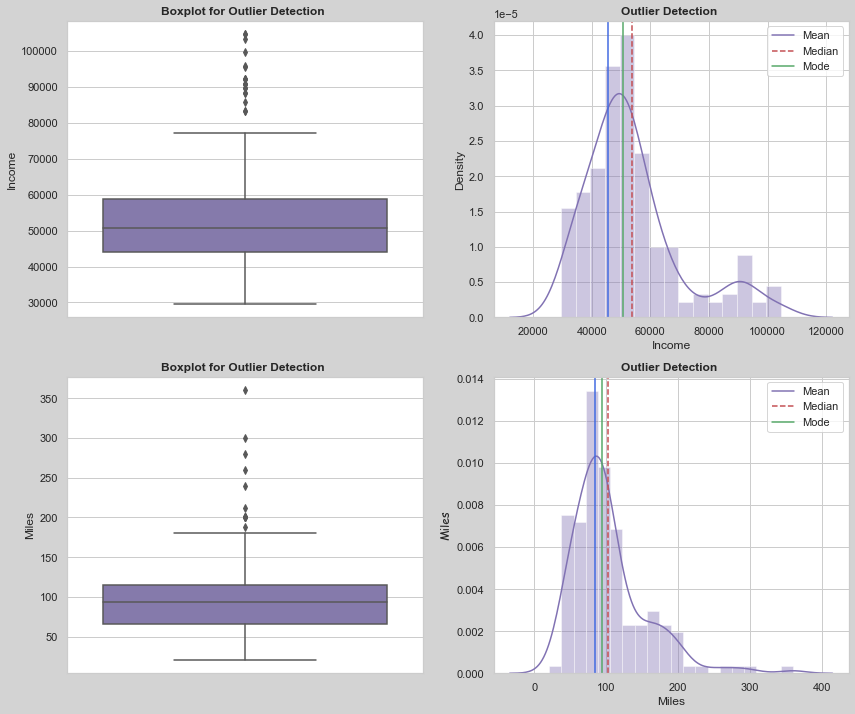

In [28]:
col_num = [ 'Income', 'Miles']
outlier_detect(treadmill_usg_data,col_num,2,2,14,12)

### Inference
  -  Both Miles and Income have significant outliers based on the above boxblot.
  -  Also both are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
  - **Majority of Customers** fall within the **USD 45,000 - USD 60,000** range
  - There are **outliers over USD 85,000**
  - Only a few of our customers run more than 180 miles per week

### Handling outliers

In [29]:
treadmill_usg_data_v1 = treadmill_usg_data.copy()

In [30]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = treadmill_usg_data_v1['Income'].quantile(0.75)
Q1 = treadmill_usg_data_v1['Income'].quantile(0.25)
IQR = Q3-Q1
treadmill_usg_data_v1 = treadmill_usg_data_v1[(treadmill_usg_data_v1['Income'] > Q1 - 1.5*IQR) & (treadmill_usg_data_v1['Income'] < Q3 + 1.5*IQR)]
plt.show()

### Removing outliers for the Mile Feature

In [31]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = treadmill_usg_data_v1['Miles'].quantile(0.75)
Q1 = treadmill_usg_data_v1['Miles'].quantile(0.25)
IQR = Q3-Q1
treadmill_usg_data_v1 = treadmill_usg_data_v1[(treadmill_usg_data_v1['Miles'] > Q1 - 1.5*IQR) & (treadmill_usg_data_v1['Miles'] < Q3 + 1.5*IQR)]
plt.show()

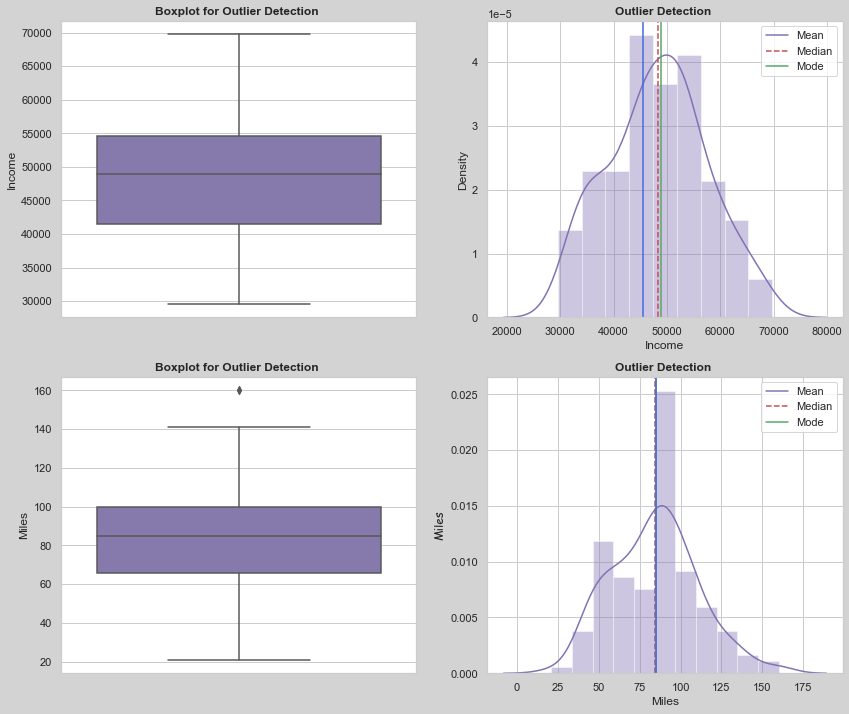

In [32]:
col_num = [ 'Income', 'Miles']
outlier_detect(treadmill_usg_data_v1,col_num,2,2,14,12)

In [33]:
treadmill_usg_data_v1.shape

(147, 12)

### Inferences
  - It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

### Categorical variable Uni-variante Analysis

In [34]:
treadmill_usg_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgeGroup', 'AgeCategory', 'IncomeSlab'],
      dtype='object')

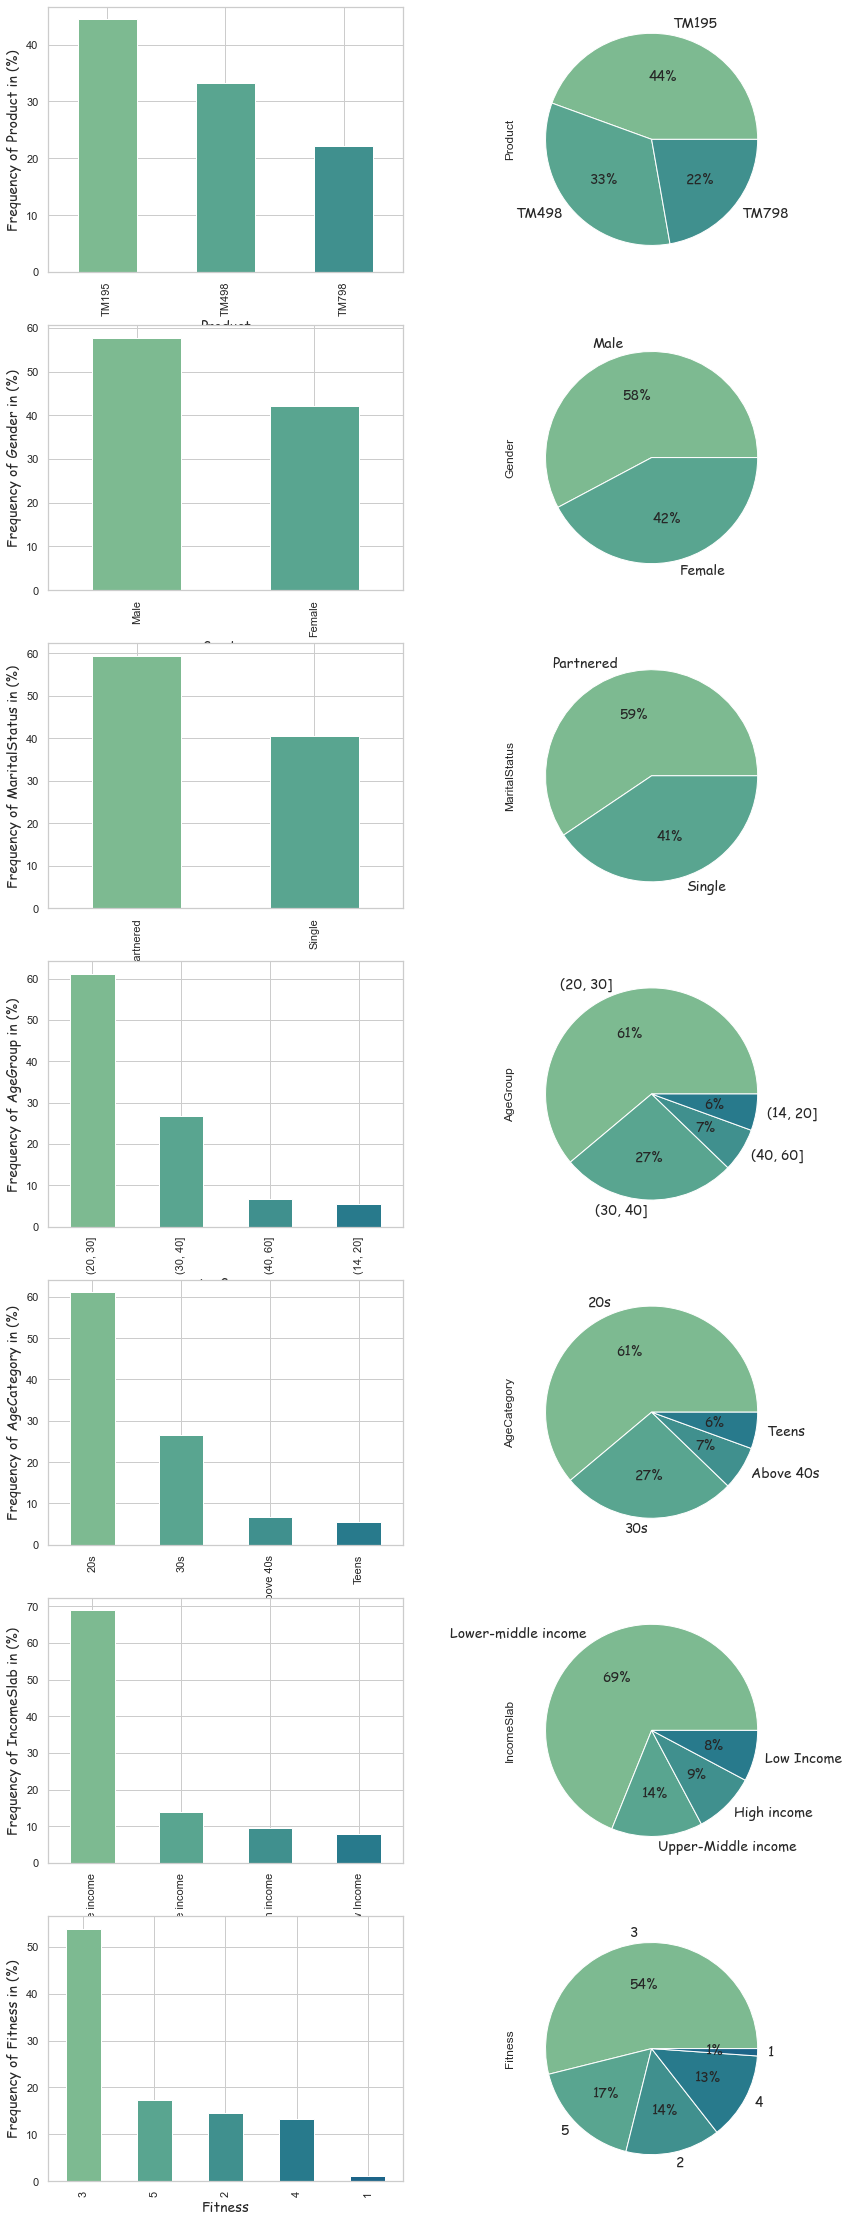

In [35]:
cat_colnames = ['Product', 'Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness']
cat_analysis(treadmill_usg_data,cat_colnames,7,2,14,40)

### Inferences 
  - **Gender**
    - **TM798 model** is the most popular among males
    - **TM195** is equally preferred by men and women
  - **AgeCategory**
    - The most useful treadmills product for people **over 40s** is the **TM195 & TM798**.However, they buy fewer treadmills.
  - **Income**
    - Customer with high income only buy high end model. **(TM798)**
  - **Fitness Level**
    - Customers with 5 fitness level prefer using TM798.(High end Model)
    - With moderate fitness level , customer prefer using TM195.
  - **Education**
    - Customer above 20 years education, purchase only **TM798** model.
    
  - The other categorical features show no specific trends.

### Bivariante Analysis for Numerical variables

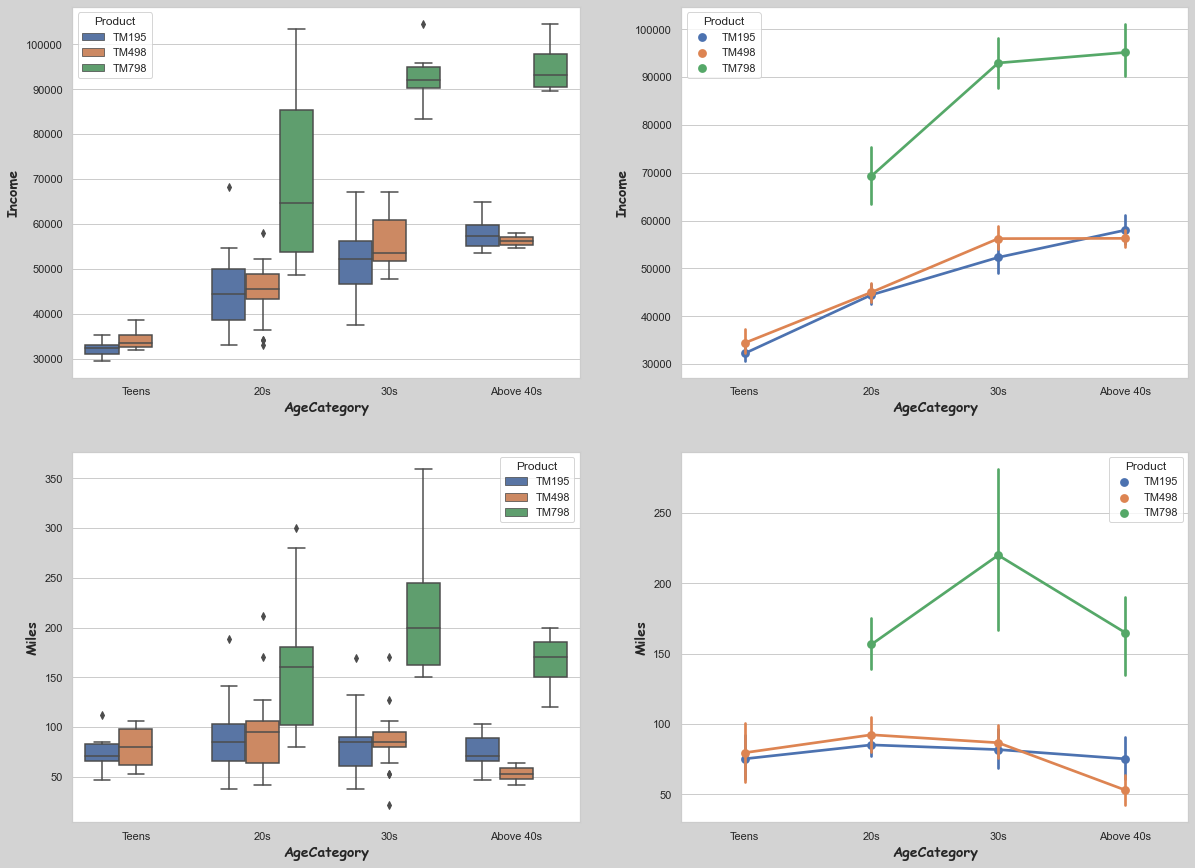

In [36]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(treadmill_usg_data,col_num,"AgeCategory","Product")

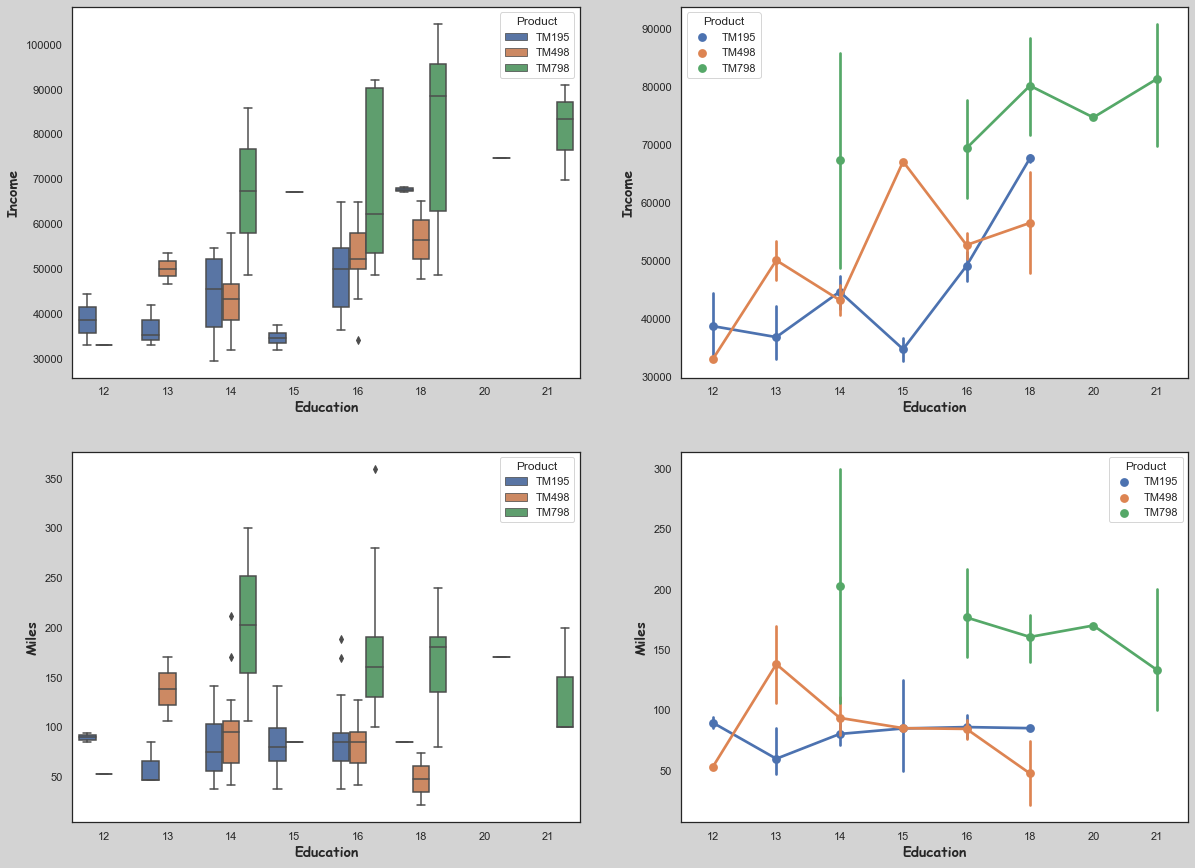

In [37]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(treadmill_usg_data,col_num,"Education","Product")

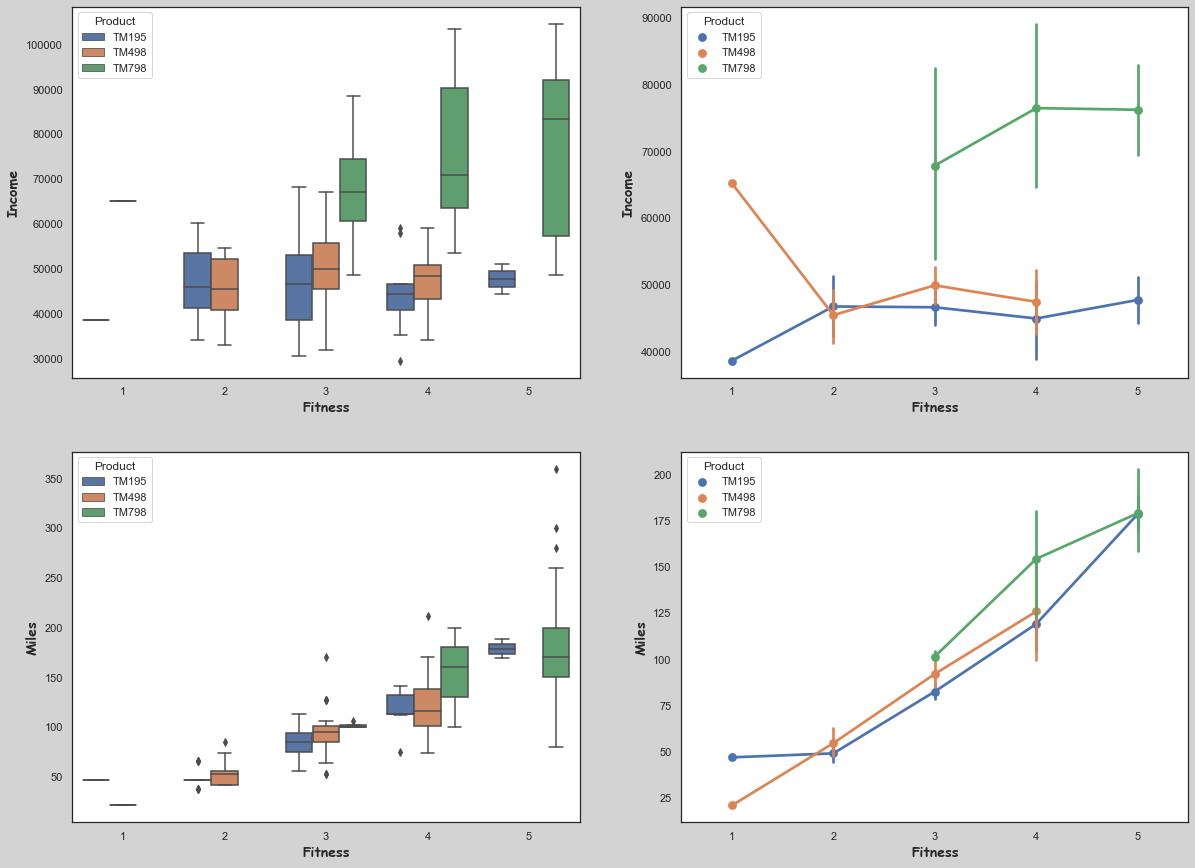

In [38]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(treadmill_usg_data,col_num,"Fitness","Product")

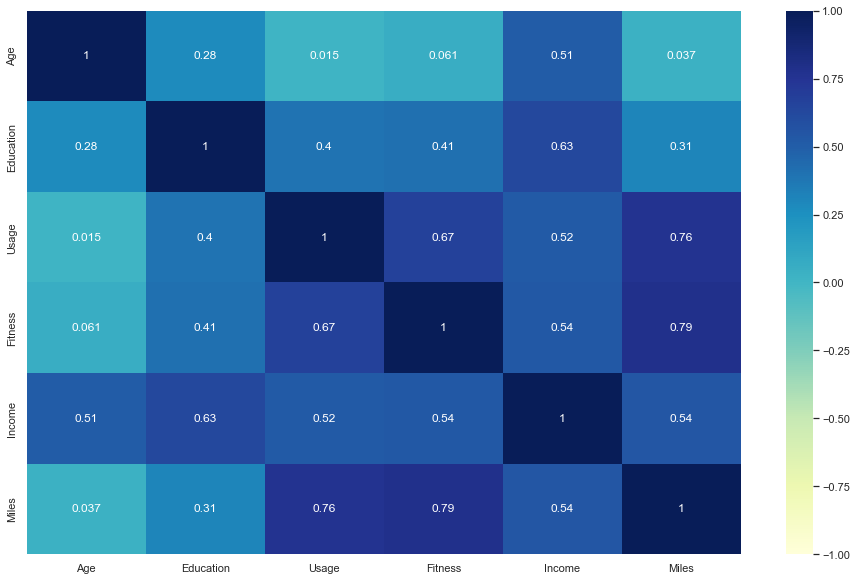

In [39]:
plt.figure(figsize = (16, 10))
sns.heatmap(treadmill_usg_data.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu") 
plt.show()

### Inferences
  - **Miles and Fitness** and **Miles and Usage** are highly correlated, which means if a customer's fitness level is high they use more treadmills.
  - **Income and education** show a strong correlation. High-income and highly educated people prefer high-end models (TM798), as mentioned during Bivariant analysis of Categorical variables.
  - There is no corelation between **Usage & Age** or **Fitness & Age** which mean Age should not be barrier to use treadmills or specific model of treadmills.

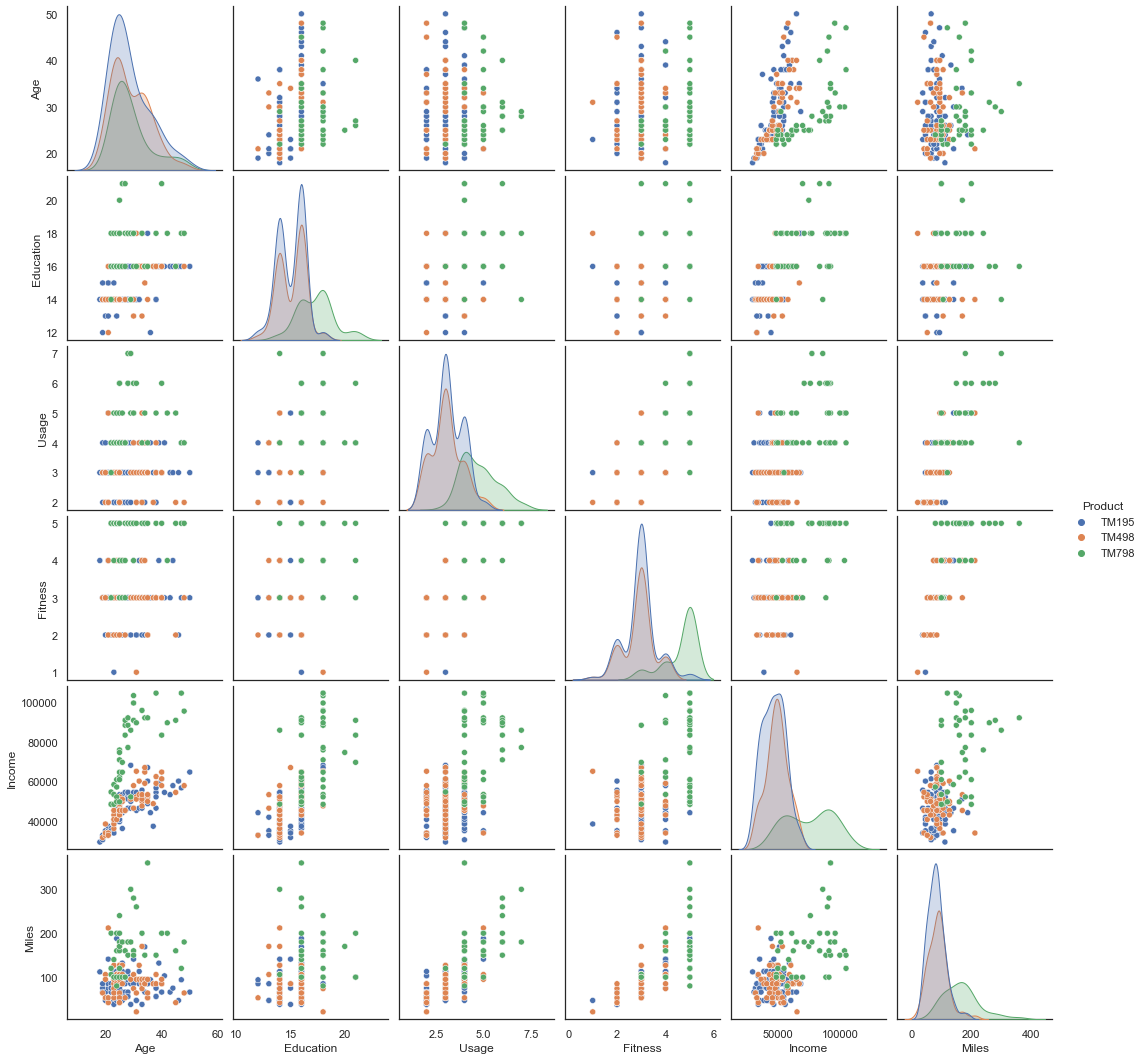

In [40]:
sns.pairplot(treadmill_usg_data, hue='Product')
plt.show()

### Analysis using Contingency Tables to Calculate Probabilities
#### (**Marginal Probabilities, Joint Probabilities, Conditional Probabilities**)

 - Product - Incomeslab
 - Product - Gender
 - Product - Fitness
 - Product - AgeCategory
 - Product - Marital Status

### Product - IncomeSlab

In [41]:
pd.crosstab(index=treadmill_usg_data['Product'], columns=[treadmill_usg_data['IncomeSlab']],margins=True) 

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
TM195,8,66,6,0,80
TM498,6,47,7,0,60
TM798,0,11,12,17,40
All,14,124,25,17,180


#### Percentage of a high-income customer purchasing a treadmill (Marginal Probability)

In [42]:
# Sum of the treadmill purchased by high income customer by total no. of customers.
round(14/180,2)*100

8.0

#### Percentage of a High-income customer purchasing TM798 treadmill (Joint Probability)

In [43]:
# Sum of the treadmill with model TM798 purchased by high income customer by total no. of customers.
round(17/180,2)*100

9.0

#### Percentage of customer with high-Income salary buying treadmill given that Product is TM798 (Conditional Probability)

In [44]:
round(17/17,2)*100

100.0

### Inference 
  - Customers having salary more than **USD dollar 85,000 buys only TM798** (high-end Model). 

### Product - Gender

In [45]:
pd.crosstab(index=treadmill_usg_data['Product'], columns=[treadmill_usg_data['Gender']],margins=True) 

Gender,Female,Male,All
Product,,,
TM195,40,40,80
TM498,29,31,60
TM798,7,33,40
All,76,104,180


#### Percentage of a Male customer purchasing a treadmill

In [46]:
prob = round((104/180),2)
pct = round(prob*100,2)
pct

58.0

#### Percentage of a Female customer purchasing TM798 treadmill

In [47]:
prob = round((7/180),2)
pct = round(prob*100,2)
pct

4.0

#### Percentage of Female customer buying treadmill given that Product is TM195

 - P(A|B) = P(A,B)/P(B)
 - P(Female|TM195) = P(Female,TM195)/P(TM195)

In [48]:
prob = round((40/80),2)
pct = round(prob*100,2)
pct

50.0

### Inference 
  - Female customer prefer to buy TM195 & TM498
  - 50% of female tend to purchase treadmill model TM195

### Product - Fitness

In [49]:
pd.crosstab(index=treadmill_usg_data['Product'], columns=[treadmill_usg_data['Fitness']],margins=True) 

Fitness,1,2,3,4,5,All
Product,,,,,,
TM195,1,14,54,9,2,80
TM498,1,12,39,8,0,60
TM798,0,0,4,7,29,40
All,2,26,97,24,31,180


#### Percentage of a customers having fitness level5 are

In [50]:
prob = round((31/180),2)
pct = round(prob*100,2)
pct

17.0

#### Percentage of a customer with Fitness Level 5 purchasing TM798 treadmill 

In [51]:
prob = round((29/180),2)
pct = round(prob*100,2)
pct

16.0

#### Percentage of customer with fitness level-5 buying TM798 treadmill given that Product is TM798

In [52]:
prob = round((29/31),2)
pct = round(prob*100,2)
pct

94.0

### Inference 
  - 94% of customers with fitness level 5, purchased TM798

### Product - AgeCategory

In [53]:
pd.crosstab(index=treadmill_usg_data['Product'], columns=[treadmill_usg_data['AgeCategory']],margins=True) 

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
TM195,6,49,19,6,80
TM498,4,31,23,2,60
TM798,0,30,6,4,40
All,10,110,48,12,180


#### Percentage of customers with Age between 20s and 30s use treadmills

In [54]:
prob = round((110/180),2)
pct = round(prob*100,2)
pct

61.0

### Inference
  - Teen doesnot prefer to buy TM798
  - 61% of customer with Age group between 20 and 30 purchase treadmills.

### Product - Marital Status

In [55]:
pd.crosstab(index=treadmill_usg_data['Product'], columns=[treadmill_usg_data['MaritalStatus']],margins=True) 

MaritalStatus,Partnered,Single,All
Product,,,
TM195,48,32,80
TM498,36,24,60
TM798,23,17,40
All,107,73,180


In [56]:
prob = round((107/180),2)
pct = round(prob*100,2)
pct

59.0

### Inferences 
  - 59 percent of customer with maritial Stuatus as Partnered by the treadmills.

## Conclusion (Important Observations):

  - Model **TM195** is the **best-selling product**. **44.0%** of all treadmill **sales go to model TM195.**
  - The majority of treadmill customers fall within the **USD 45,000 - USD 80,000** income bracket. **83%** of treadmills are bought by individuals with incomes between **USD dollor 35000 and 85000.**
  - There are only **8%** of customers with **incomes below USD 35000** who buy treadmills.
  - **88%** of treadmills are purchased by **customers aged 20 to 40.**
  - **Miles and Fitness** & **Miles and Usage** are highly correlated, which means if a customer's fitness level is high they use more treadmills.
  - **TM781** is the only model purchased by a customer who has more than **20 years of education and an income of over USD dollor 85,000.**
  - With **Fitness level 4 and 5,** the customers tend to use **high-end models** and the **average number of miles is above 150 per week** 

## Recommendations
  - **TM195 & TM498** are popular with customers earning **USD 45,000 and USD 60,000** and can be offered by these companies as **affordable models.**
  - **TM798** should be marketed as a **Premium Model** and marketing it to **high income groups and educational over 20 years** market segments could result in more sales.
  - Aerofit should conduct **market research** to determine if it can attract customers with **income under USD 35,000 to expand its customer base.**
  - The **TM798 is a premium model**, so it is ideally suited for **sporty people** who have a high average weekly mileage.